## Обзор данных

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as st
import matplotlib.pyplot as plt

Загрузим файл с данными и изучим общую информацию:

In [2]:
pth1 = '...'
pth2 = ''

if os.path.exists(pth1):
    data = pd.read_csv(pth1)
elif os.path.exists(pth2):
    data = pd.read_csv(pth2)
else:
    print('Проверьте путь к файлу')

In [3]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Вывод

Датасет состоит из 16715 строк и 11 колонок.
Описание данных:

...

## Предобработка данных

### Приведем названия столбцов к нижнему регистру

In [5]:
data.columns = data.columns.str.lower()

### Обработка пропусков

Проверим пропуски в данных:

In [6]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

**В столбце name** всего 2 пропуска. Удалим эти строки, потому что название - это ключевая характеристика для нашей задачи анализа. 

In [7]:
data = data.dropna(subset=['name'])
data['name'].isna().sum()

0

**В столбце year_of_release** 269 пропусков. Данные о годе выпуска также являются ключевыми для анализа.

Всего пропуски составляют 1.6% от датасета - это менее 5%, поэтому можно их удалить.

Удалим пропуски:

In [8]:
data = data.dropna(subset=['year_of_release'])
data['year_of_release'].isna().sum()

0

**В столбце genre** было всего 2 пропуска, но строки с этими пропусками были удалены ранее.

In [9]:
data['genre'].isna().sum()

0

**В столбце critic_score** 8461 пропуск, это 50% данных.

**В столбце user_score** 6605 пропусков, это 39,5% данных.

Но логически заполнить эти данные нечем. 

Исходя из того, что  рейтинги - это числовые характеристики, и в дальнейшем необходимо будет определить влияние оценок критиков и отзывов пользователей на продажи внутри одной платформы, будет неудобно заполнить пропуски текстовыми заглушками, иначе тип данных станет object, а для анализа нужен числовой. Поэтому оставим пропуски как есть и при дальнейшем анализе будем использовать логическую индексацию для выбора заполненных строк.

**В столбце rating** 6676 пропусков, это 39,9% данных.

Здесь рейтинг имеет буквенное обозначение, то есть данные категориальные, значит пропущенные значения мы можем заполнить заглушкой "unknown".

In [10]:
# количество пропусков в столбцах
data[['critic_score', 'user_score', 'rating']].isna().sum()

critic_score    8461
user_score      6605
rating          6676
dtype: int64

In [11]:
# проверяем уникальные значения в стоблце rating
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [12]:
# заполняем пропуски заглушкой unknown
data['rating'] = data['rating'].fillna('unknown')

Все пропуски обработали.

### Преобразование типов данных

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           16444 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


**Изменим тип данных некоторых столбцов:**

**year_of_release**  - год выпуска игры - всегда целочисленное значение, поэтому приведем столбец к типу int.

**user_score** - оценка пользователей - выражается числом с дробной частью, но также имеются значения tbd, что означает "To Be Determined", то есть "подлежит определению". Для анализа тип данных лучше перевести из строкового в вещественные числа float64, а значения tbd по сути все равно, что пропуски, они как раз заменятся на nan.

In [14]:
data['year_of_release'] = data['year_of_release'].astype(int)
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

In [15]:
data[['year_of_release', 'user_score']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year_of_release  16444 non-null  int64  
 1   user_score       7463 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 385.4 KB


Проверили наличие ошибок в данных с рейтингами от критиков и пользователей: числа не должны превышать 100 и 10 пунктов соответственно. Ошибок нет:

In [16]:
data.query('user_score > 10')['user_score'].count()

0

In [17]:
data.query('critic_score > 100')['critic_score'].count()

0

### Добавление нового столбца

Для дальнейшего анализа посчитаем суммарные продажи во всех регионах и запишим данные в отдельный столбец.

In [18]:
data['total_sales'] = (data[['na_sales','eu_sales','jp_sales', 'other_sales']]
                       .sum(axis = 1))

In [19]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


In [20]:
# сбросим индексы после изменений
data = data.reset_index(drop=True)

### Вывод по предобработке данных

В ходе предобработки данных были выполнены следующие работы:
- Привели названия столбцов к нижнему регистру
- Заполнили пропуски в данных
- Преобразовали типы данных
- Рассчитали и добавили новый столбец

В ходе предобработки было удалено 271 строка, это 1,62% данных. 

Для заполнения пропусков и изменения типов данных использовали методы fillna(), pd.to_numeric,  astype().

В столбце name - название игры, было 2 строки с пропусками. Название - это ключевая характеристика для нашей задачи анализа. Заполнить нечем, поэтому удалили эти строки.

В столбце year_of_release - год выпуска игры, было 269 пропусков, что составляет 1.6% от датасета, удалили их.

В столбце genre - жанр игры было 2 пропуска, но строки с этими пропусками были удалены ранее.

В столбце critic_score - оценка критиков (максимум 100) 8461 пропуск, это 50% данных.

В столбце user_score - оценка пользователей (максимум 10) 6605 пропусков, это 39,5% данных.

Оставили пропуски как есть, так как логически заполнить эти данные нечем, при дальнейшем анализе будем использовать логическую индексацию для выбора заполненных строк.

В столбце rating - рейтинг от организации 'ESRB' 6676 пропусков, это 39,9% данных. Пропущенные значения заполнили заглушкой "unknown".

Изменили тип данных некоторых столбцов:

year_of_release - год выпуска игры, привели к типу int.

user_score - оценка пользователей, перевели из строкового в вещественные числа float64, а значения tbd заменили на nan.

Для дальнейшего анализа рассчитали суммарные продажи во всех регионах и добавили данные в отдельный столбец total_sales.

## Исследовательский анализ данных

### Анализ выпуска игр

Посмотрим, сколько игр выпускалось в разные годы. Проанализируем все периоды.

In [21]:
data.groupby('year_of_release').agg(game_count=('name', 'count'))

,game_count
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


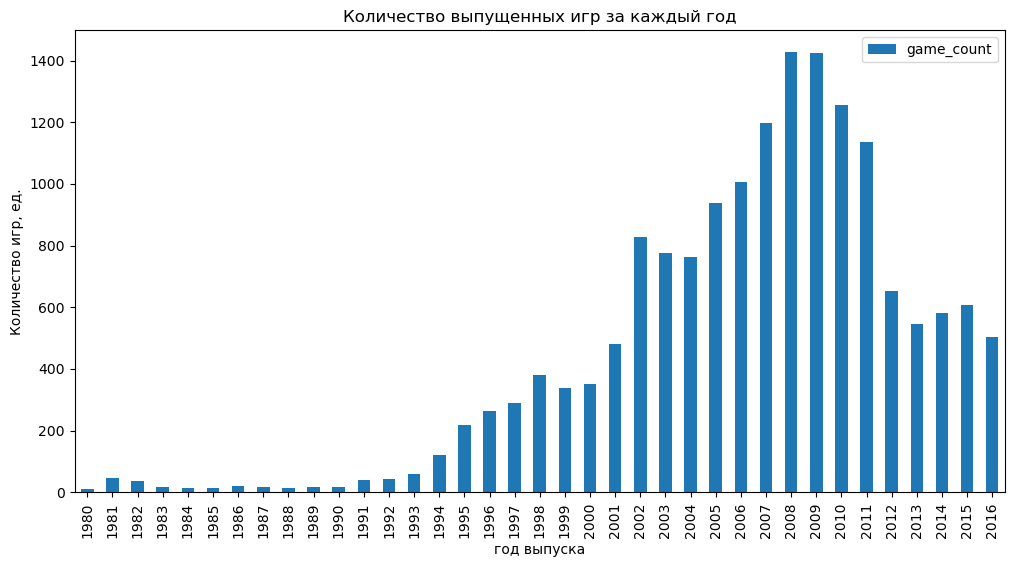

In [22]:
data.groupby('year_of_release').agg(game_count=('name', 'count'))\
.plot(kind='bar', figsize=(12, 6))
plt.title('Количество выпущенных игр за каждый год')
plt.xlabel('год выпуска')
plt.ylabel('Количество игр, ед.')
plt.show()

**Вывод** 

По имеющимся у нас данным, с 1980 по 1993 год выпускалось до 60 игр в год. 

Начиная с 1993 года наблюдался устойчивый рост в выпуске игр.

В 2002 году произошел резкий скачок, количество выпускаемых игр увеличилось на 72% по сравнению с предыдущим годом (2001г- 482 игры, 2002г- 829), рост продолжался до 2010 года, пик пришелся на 2008-2009 годы с выпуском в 1427 и 1426 игр/год. 

В 2010 выпуск пошел на спад, особенно резкое снижение произошло в 2012 году, на 42,5% по сравнению с предыдущим годом (2011г- 1136 игр, 2012г- 653). 

Далее с 2012 года до сегоднешнего дня (декабрь 2016 года) колебания находятся в пределах 500-650 игр/год.   

### Анализ продаж по платформам

Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами за все годы.

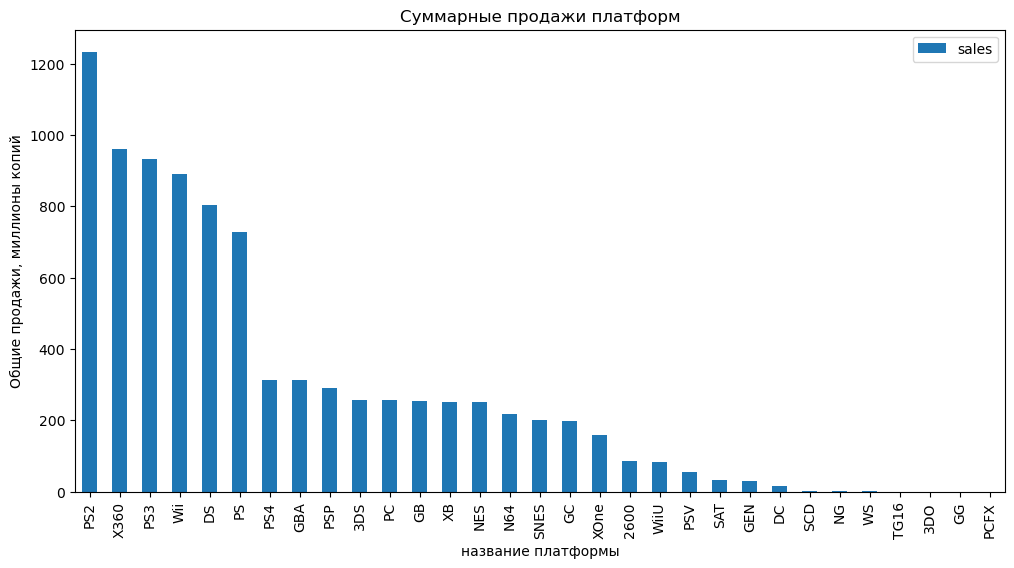

In [23]:
data.groupby('platform').agg(sales=('total_sales', 'sum'))\
.sort_values(by='sales', ascending=False)\
.plot(kind='bar', figsize=(12, 6))
plt.title('Суммарные продажи платформ')
plt.xlabel('название платформы')
plt.ylabel('Общие продажи, миллионы копий')
plt.show()

Выберем первые 5 платформ с наибольшими суммарными продажами и построим распределение продаж по годам. 

In [24]:
# список топ 5 платформ
top5_all_years = ['PS2', 'X360', 'PS3', 'Wii', 'DS']

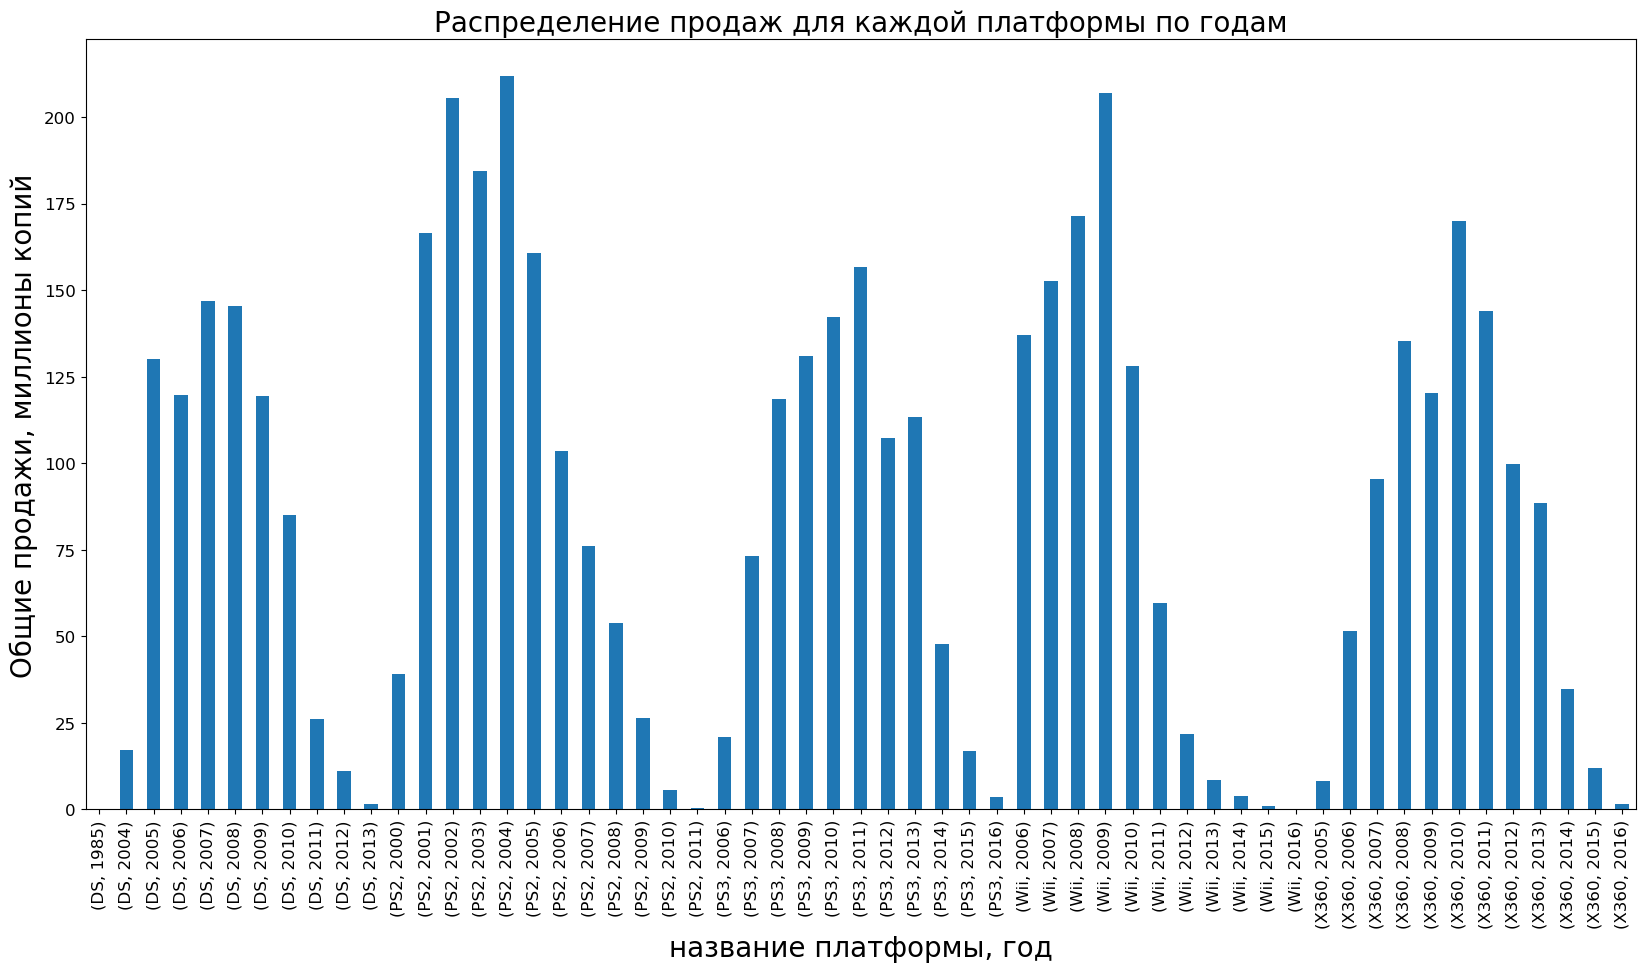

In [25]:
# распределение продаж для каждой платформы по годам
data.query('platform in @top5_all_years')\
.groupby(['platform', 'year_of_release'])['total_sales'].sum()\
.plot(kind='bar', figsize=(20, 10))
plt.title('Распределение продаж для каждой платформы по годам', fontsize=20)
plt.xlabel('название платформы, год', fontsize=20)
plt.ylabel('Общие продажи, миллионы копий', fontsize=20)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

**Вывод** По данному графику видно, что характерный срок "жизни" платформы составляет 10-11 лет. Своего пика продажи для новой платформы достигают на 5-6 год, далее наблюдается спад.

### Анализ лидеров продаж, выбор потенциально прибыльных платформ

Так как технологии в сфере компьютерных игр развиваются стремительно, то данные за все время наблюдений будут для нас не информативны. Для решения задачи проекта возьмем данные за последние три полных года (2013 - 2015), исключая текущий 2016, так как данные за него неполные. 

In [26]:
# отберем данные из общего датасета за актуальный период
actual_data = data.query('2012 < year_of_release < 2016')

Посмотрим, какие платформы являются лидерами продаж за 2013-2015 годы:

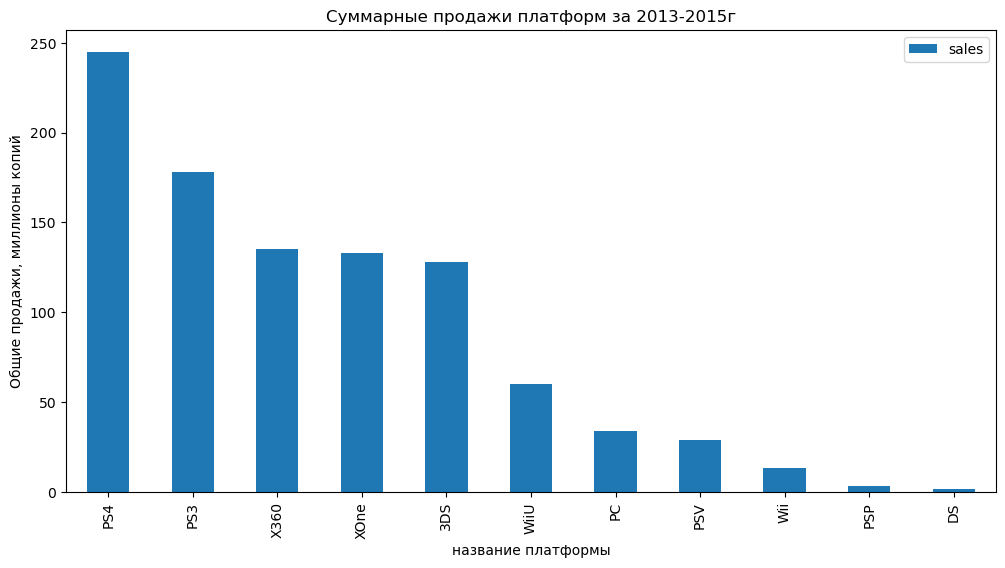

In [27]:
# продажи платформ за 2013-2015
actual_data.groupby('platform').agg(sales=('total_sales', 'sum'))\
.sort_values(by='sales', ascending=False)\
.plot(kind='bar', figsize=(12, 6))
plt.title('Суммарные продажи платформ за 2013-2015г')
plt.xlabel('название платформы')
plt.ylabel('Общие продажи, миллионы копий')
plt.show()

**Вывод** Выделим топ 5 лидеров продаж за 2013-2015 годы: PS4, PS3, X360, XOne, 3DS.

In [28]:
# список топ 5 платформ актуального периода и данные по ним
top5_actual = ['PS4', 'PS3', 'X360', 'XOne', '3DS']
actual_data_top5 = data.query('(2012 < year_of_release < 2016) and platform in @top5_actual')

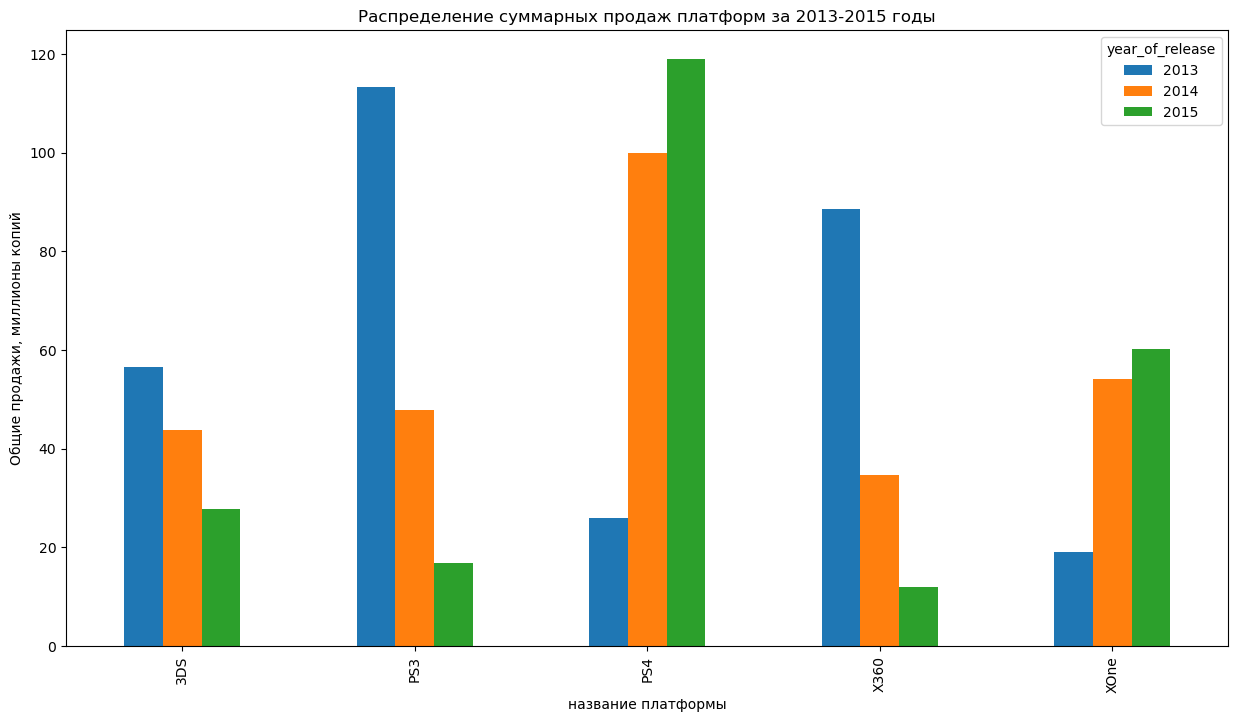

In [29]:
# распределение продаж для топ 5 платформ new по годам 2013-2015
actual_data_top5\
.pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc=sum)\
.plot(kind='bar', figsize=(15, 8))
plt.title('Распределение суммарных продаж платформ за 2013-2015 годы')
plt.xlabel('название платформы')
plt.ylabel('Общие продажи, миллионы копий')
plt.show()

**Вывод** 

По графику можно сделать вывод о том, что лидером продаж 2015 года является PS4. В качестве потенциально прибыльных платформ можно выделить PS4 и XOne, жизненный цикл платформ находится в стадии роста, их продажи растут. Остальные платформы показывают снижение продаж в последние три года.

Построим график «диаграмма размаха» по глобальным продажам игр в разбивке по платформам.

In [30]:
# создадим таблицу с отсортированными медианными продажами игр по платформам для 
# дальнейней сортировки боксплотов
platform_median_sales = (actual_data_top5.groupby('platform', as_index=False)
                         ['total_sales'].median()
                         .sort_values(by='total_sales', ascending=False)
                        )
platform_median_sales

,platform,total_sales
4,XOne,0.35
2,PS4,0.31
3,X360,0.29
1,PS3,0.19
0,3DS,0.10


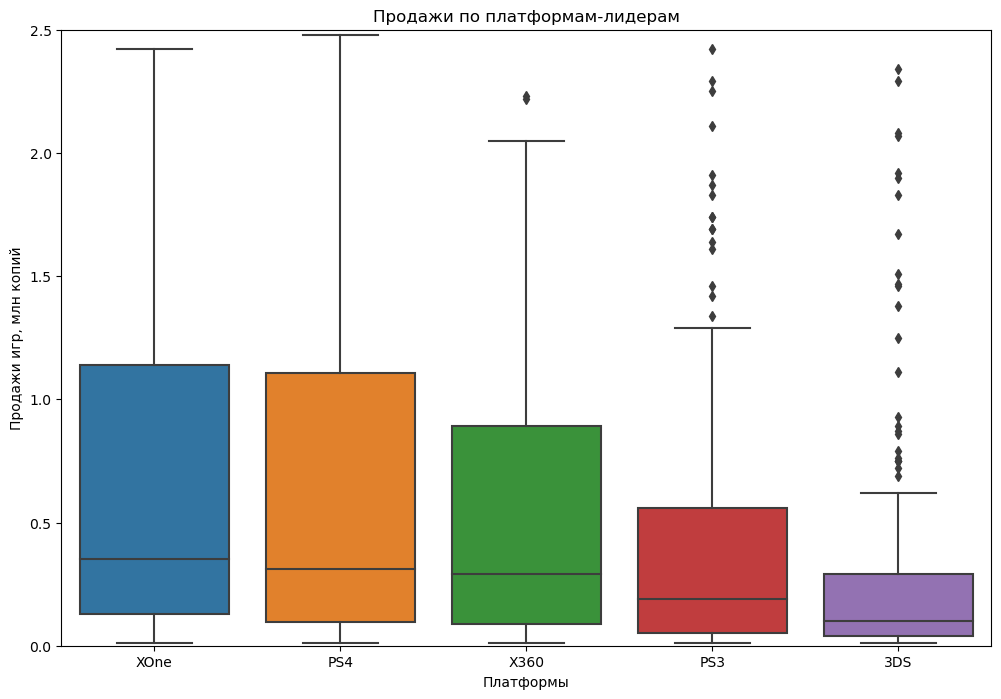

In [31]:
# построим диаграммы размаха 
plt.figure(figsize=(12, 8))
sns.boxplot(data=actual_data_top5, x='platform', y='total_sales', 
            order=platform_median_sales['platform']).\
set(title='Продажи по платформам-лидерам', xlabel='Платформы', 
    ylabel='Продажи игр, млн копий')
plt.ylim(0, 2.5)
plt.show()

**Вывод** 

По этой диаграмме также можно выделить двух лидеров: 

XOne - на первом месте, т.к. его типичные объемы продаж (медиана и третий квантиль) находятся чуть выше остальных, далее с небольшим отставанием PS4. 

Самые низкие типичные объемы продаж у 3DS, 75% их продаж на уровне медианных продаж лидеров.

### Влияние на продажи отзывов пользователей и критиков

Посмотрим на примере одной платформы, как влияют на продажи отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

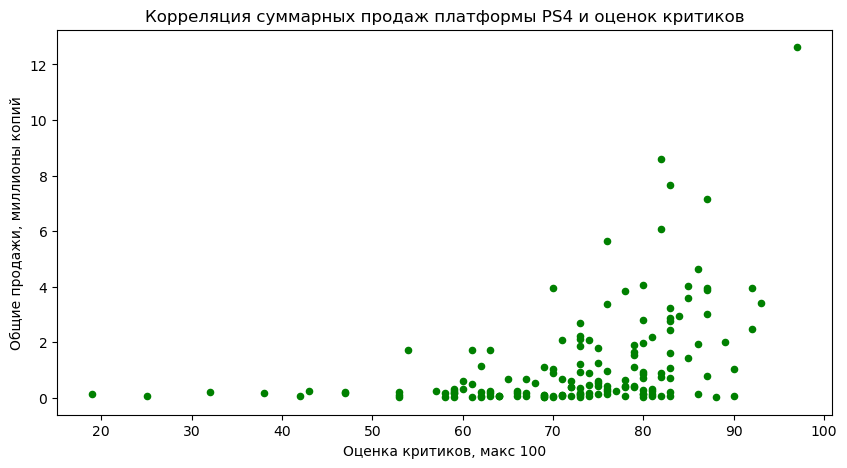

In [32]:
actual_data_top5.query('platform == "PS4"')\
.plot(y='total_sales', x='critic_score', kind='scatter', figsize=(10, 5), color='g')
plt.title('Корреляция суммарных продаж платформы PS4 и оценок критиков')
plt.xlabel('Оценка критиков, макс 100')
plt.ylabel('Общие продажи, миллионы копий')
plt.show()

Мы видим, что при оценке критиков до 50 пунктов (низкая оценка) кореляция между продажами и оценкой не наблюдается. 

**Вывод** Оценка критиков выше 50 повышает количество продаж, сильнее эта зависимость видна при оценке критиков выше 70 пунктов.

На графике мы наблюдаем устойчивую "прямую" со значениями продаж меньше 0,5 млн копий. Проверим на отдельном графике корреляцию этих продаж:

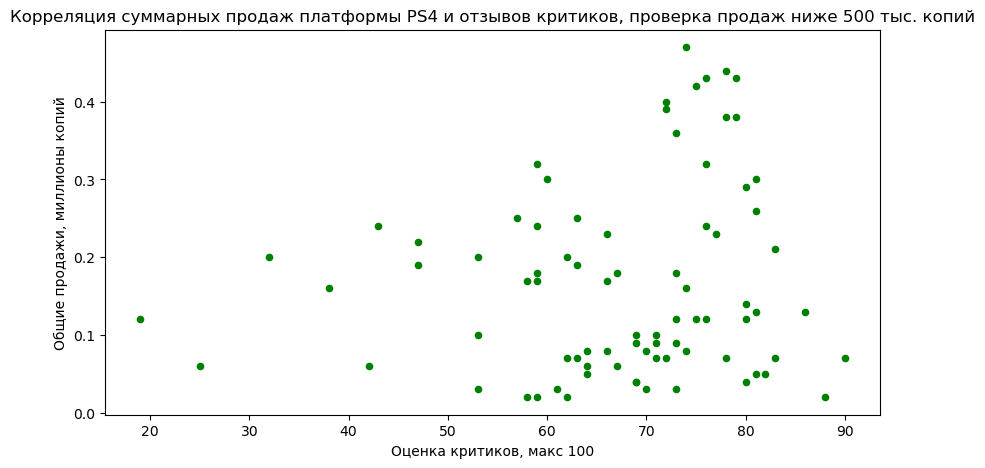

In [33]:
actual_data_top5.query('total_sales < 0.5 and platform == "PS4"').\
plot(y='total_sales', x='critic_score', kind='scatter', figsize=(10, 5), color='g')
plt.title('Корреляция суммарных продаж платформы PS4 и отзывов критиков, \
проверка продаж ниже 500 тыс. копий')
plt.xlabel('Оценка критиков, макс 100')
plt.ylabel('Общие продажи, миллионы копий')
plt.show()

Рассчитаем коэффициент кореляции для общих продаж:

In [34]:
actual_data_top5['total_sales'].corr(actual_data_top5['critic_score']).round(2)

0.38

На графике мы видим, что при продажах меньше 500 тыс. копий корреляция с рейтингом критиков тоже существует, и также усиливается при оценке более 50 пунктов.

Коэффициент корреляции по общим продажам равен 0.42, он невысокий по-видимому из-за того, что корреляция выражена только на части данных с оценкой критиков более 50. 

**Вывод** Игры покупают чаще, если они имеют высокие рейтинги критиков, особенно оценку выше 70-80.

Теперь проверим взаимосвязь количества продаж игр с отзывами пользователей. Также построим диаграмму рассеяния:

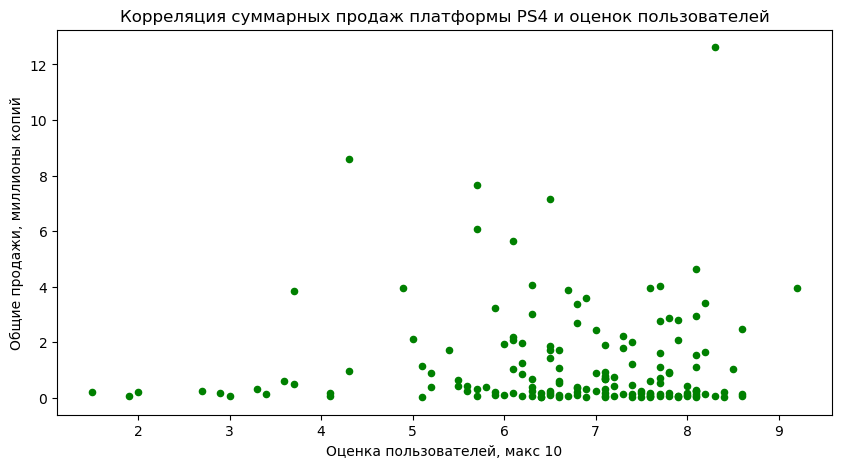

In [35]:
actual_data_top5.query('platform == "PS4"')\
.plot(y='total_sales', x='user_score', kind='scatter', figsize=(10, 5), color='g')
plt.title('Корреляция суммарных продаж платформы PS4 и оценок пользователей')
plt.xlabel('Оценка пользователей, макс 10')
plt.ylabel('Общие продажи, миллионы копий')
plt.show()

In [36]:
actual_data_top5['total_sales'].corr(actual_data_top5['user_score']).round(2)

0.01

**Вывод** Мы видим слабую взаимосвязь продаж с оценкой пользователей, коэффициент корреляции 0,01. Продажи увеличиваются при рейтинге больше 5, но дальше при изменении рейтинга от 6 до 9 продажи держатся примерно на одном уровне.

Проверим взаимосвязь оценок и продаж на других платформах из топ-5 лидеров продаж актуального периода: 'PS3', 'X360', 'XOne', '3DS'

In [37]:
# создадим функцию для построения диаграмм рассеяния для всех платформ 
# и рассчета коэффициентов корреляции
def scatter_diagram (platform):
    diagram_data = actual_data_top5.query('platform == @platform')

    figure, ax = plt.subplots(1, 2, figsize=(20, 10))
    plt.suptitle(f'Влияние оценки критиков и пользователей на продажи {platform}', fontsize=20)

    (
        diagram_data.plot(ax=ax[0], x='critic_score', y='total_sales', kind='scatter', color='g')
    )
    ax[0].set_xlabel('Оценка критиков', fontsize=16)
    ax[0].set_ylabel('Продажи', fontsize=16)

    (
        diagram_data.plot(ax=ax[1], x='user_score', y='total_sales', kind='scatter', color='g')
    )
    ax[1].set_xlabel('Оценка пользователей', fontsize=16)
    ax[1].set_ylabel('Продажи', fontsize=16)

    plt.show()

    critic_corr = diagram_data['critic_score'].corr(diagram_data['total_sales']).round(2)
    print(f'Коэффициент корреляции продаж и оценки критиков для {platform}: {critic_corr}.\n')
    user_corr = diagram_data['user_score'].corr(diagram_data['total_sales']).round(2)
    print(f'Коэффициент корреляции продаж и оценки пользователей для {platform}: {user_corr}.\n')

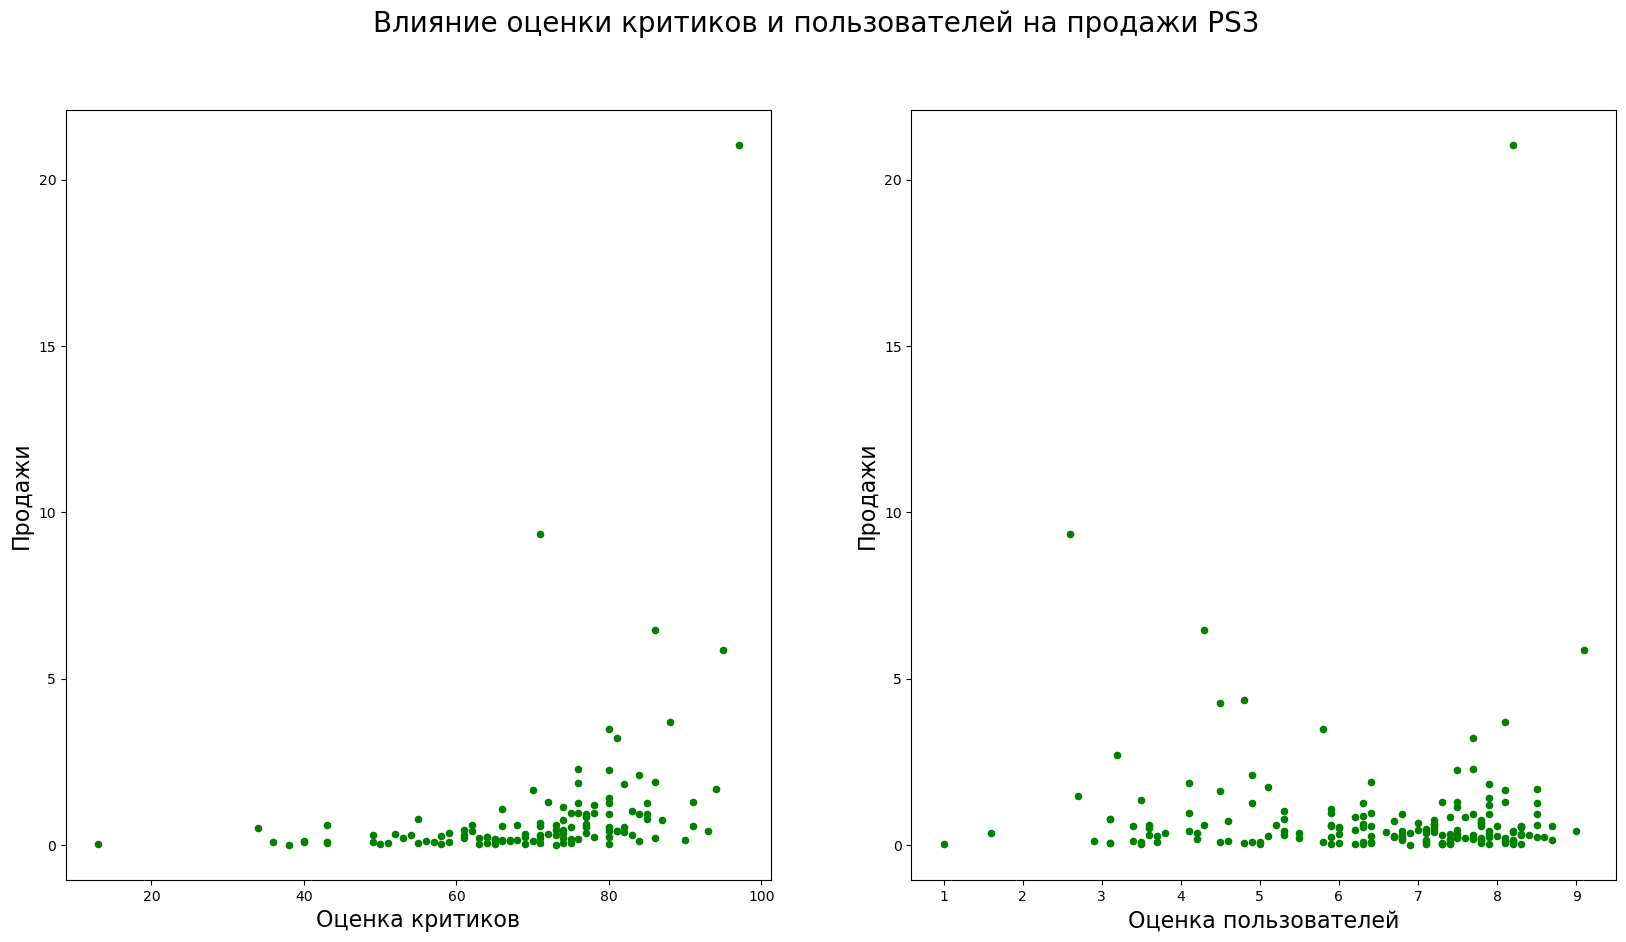

Коэффициент корреляции продаж и оценки критиков для PS3: 0.33.

Коэффициент корреляции продаж и оценки пользователей для PS3: -0.02.



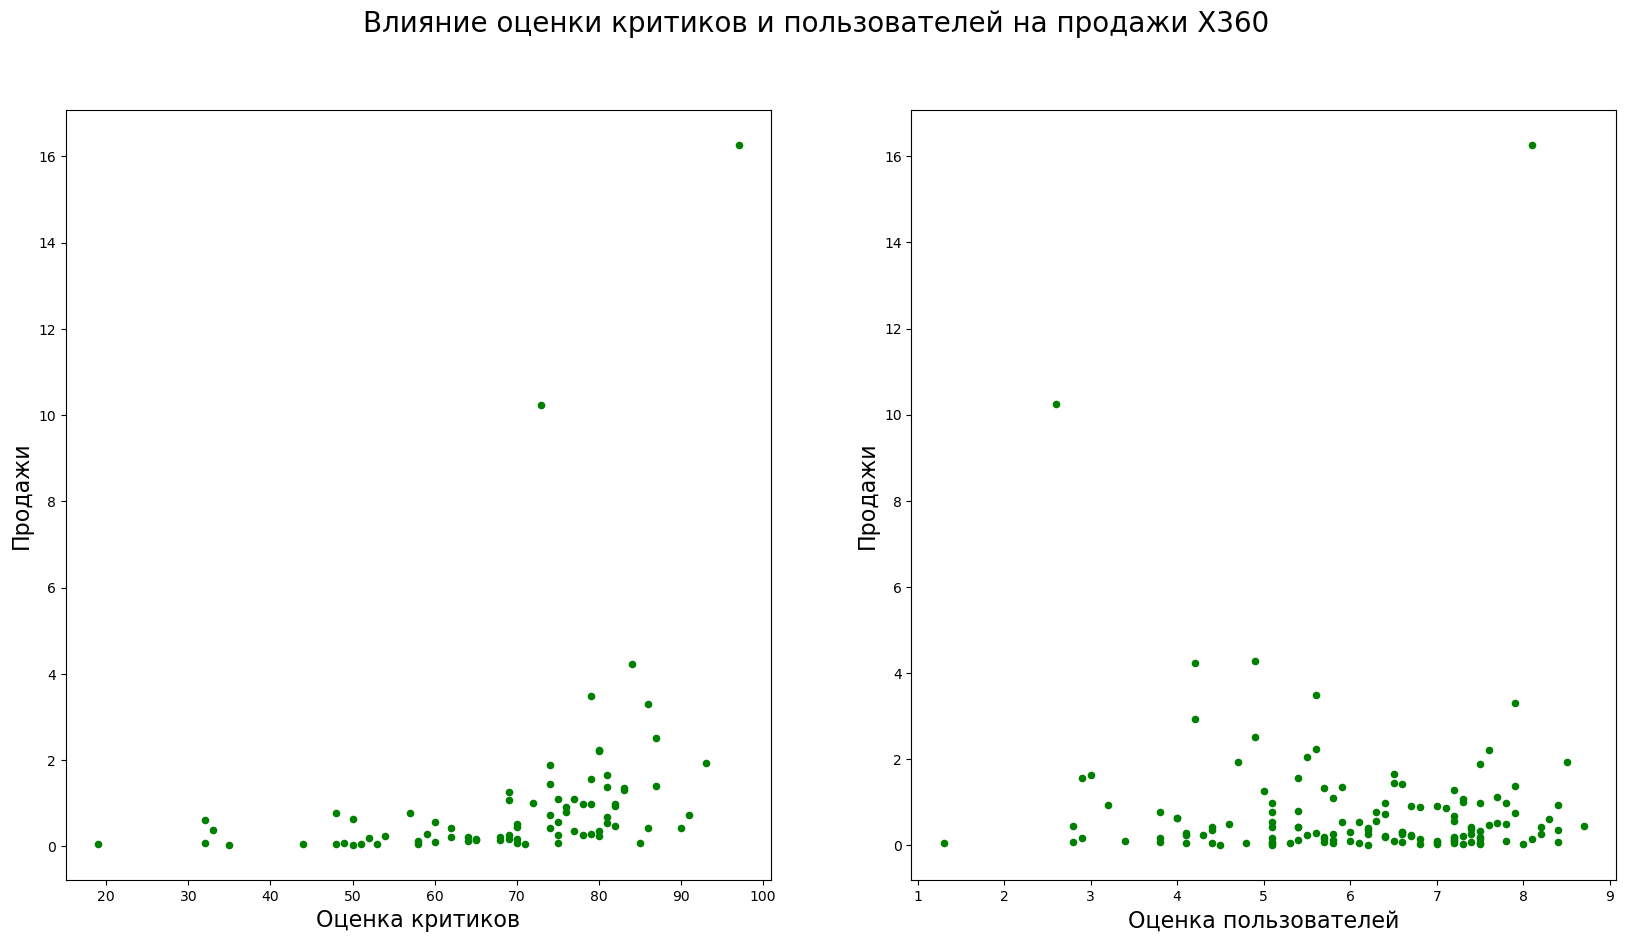

Коэффициент корреляции продаж и оценки критиков для X360: 0.35.

Коэффициент корреляции продаж и оценки пользователей для X360: -0.03.



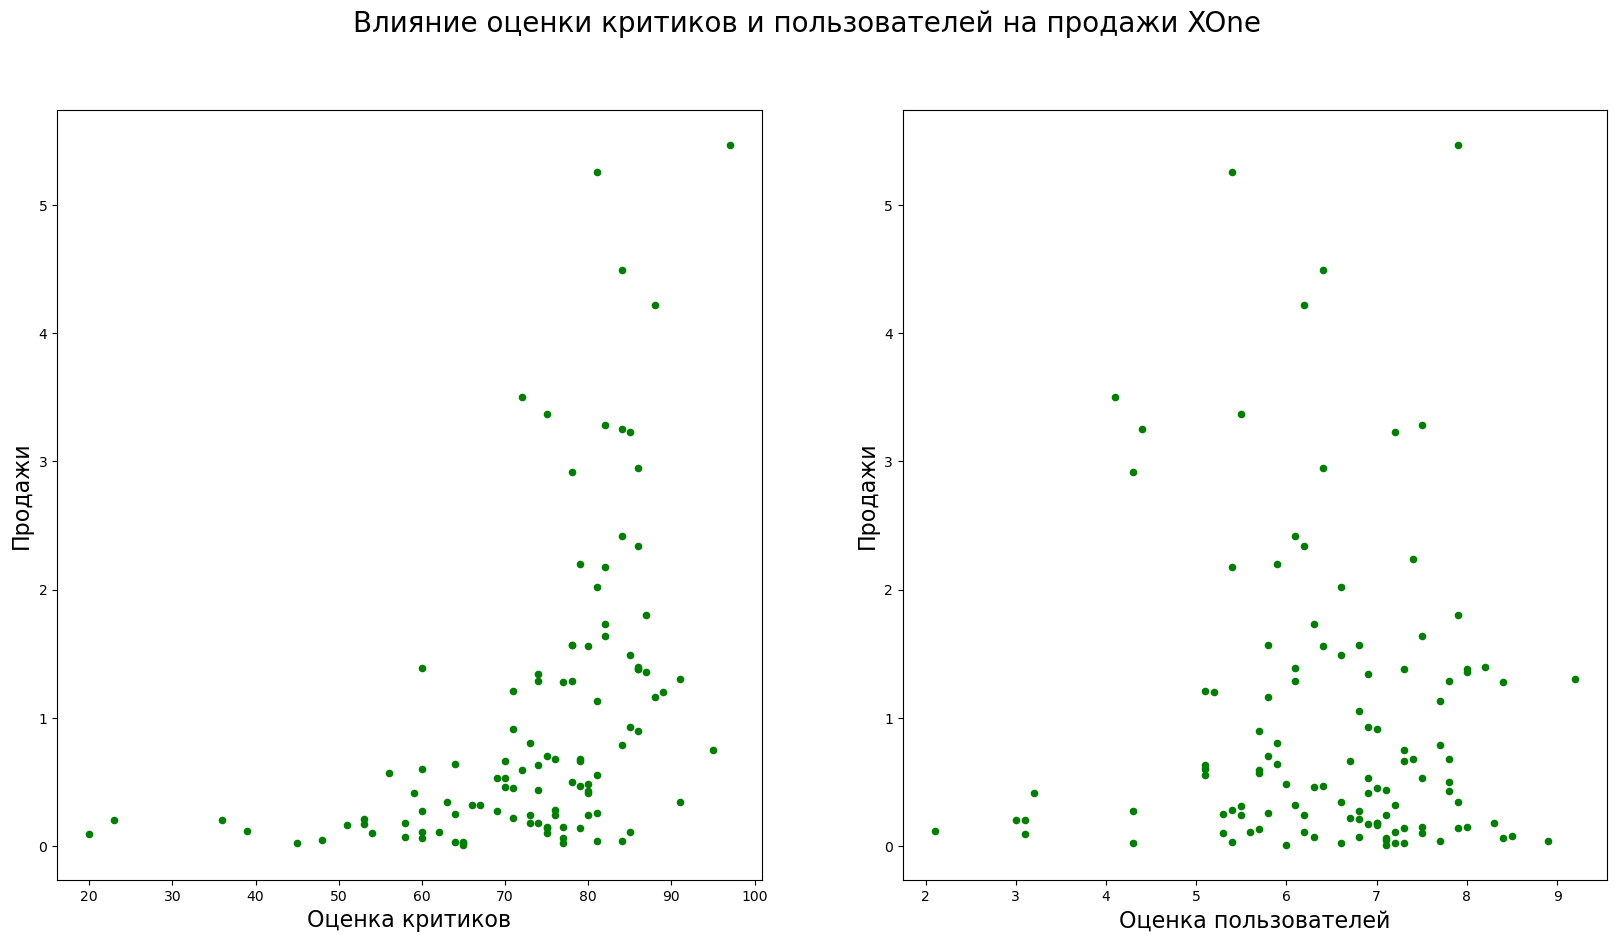

Коэффициент корреляции продаж и оценки критиков для XOne: 0.46.

Коэффициент корреляции продаж и оценки пользователей для XOne: -0.04.



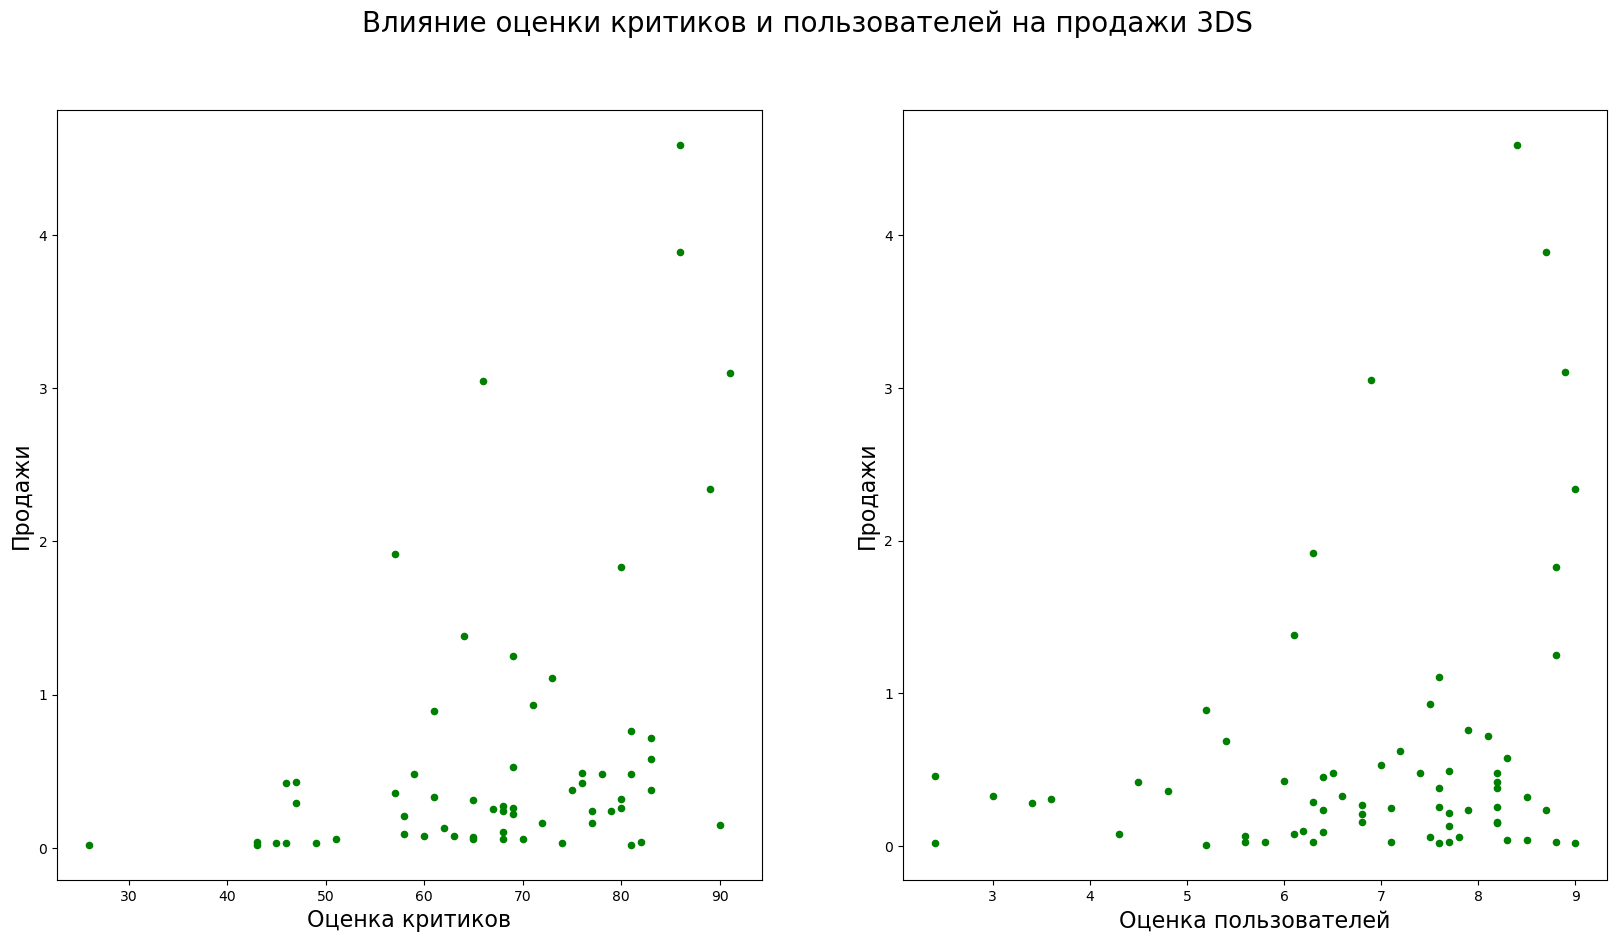

Коэффициент корреляции продаж и оценки критиков для 3DS: 0.38.

Коэффициент корреляции продаж и оценки пользователей для 3DS: 0.26.



In [38]:
for platform in ['PS3', 'X360', 'XOne', '3DS']:
    scatter_diagram(platform)

**Вывод** Остальные лидеры продаж также показывают взаимосвязь между продажами и оценками критиков: при оценке выше 50 наблюдается постепенное увеличение продаж, лучше всего продаются игры при оценках в 70-90 пунктов. 

Общий вывод по оценке пользователей:  влияние слабое либо отсутствует.

### Распределение игр по жанрам

Посмотрим на распределение игр по жанрам на выборке из топ-5 платформ актуального периода.

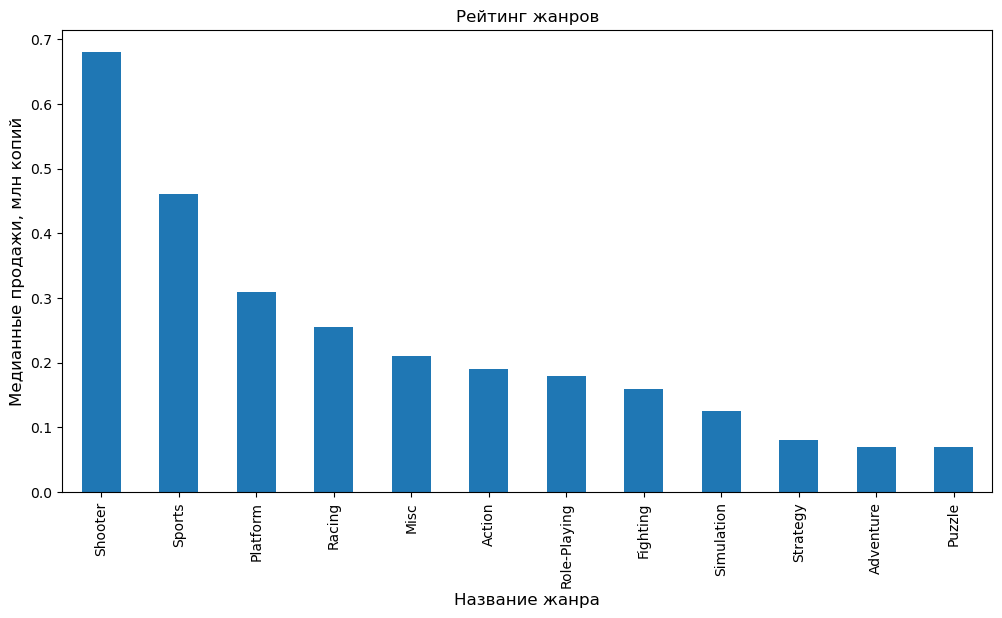

In [39]:
actual_data_top5.groupby('genre').agg(genre_median=('total_sales', 'median'))\
.sort_values(by='genre_median', ascending=False)\
.plot(kind='bar', figsize=(12, 6), legend=False)
plt.title('Рейтинг жанров', fontsize=12)
plt.xlabel('Название жанра', fontsize=12)
plt.ylabel('Медианные продажи, млн копий', fontsize=12)
plt.show()

**Вывод** Самые высокие медианные продажи, а соответственно, и прибыльные у жанров (по убыванию): Shooter, Sports, Platform, Racing и Misc. 

## Портрет пользователя каждого региона

### Самые популярные платформы в регионах

Определим самые популярные платформы (топ-5) для пользователя каждого региона (Северная Америка - NA, Европа - EU, Япония - JP):

In [40]:
# создадим функцию для построения диаграмм по регионам
def pie_diagram(key, value, category):
    actual_data.groupby(category).agg(sales=(key, 'sum'))\
    .sort_values(by='sales', ascending=False)\
    .plot(kind='pie', y='sales', autopct='%1.1f%%', fontsize=12, pctdistance=0.8,\
      labeldistance=1.1, legend=False, figsize=(35, 8))
    plt.title(f'{value}, 2013-2015г', fontsize=14)
    plt.show()

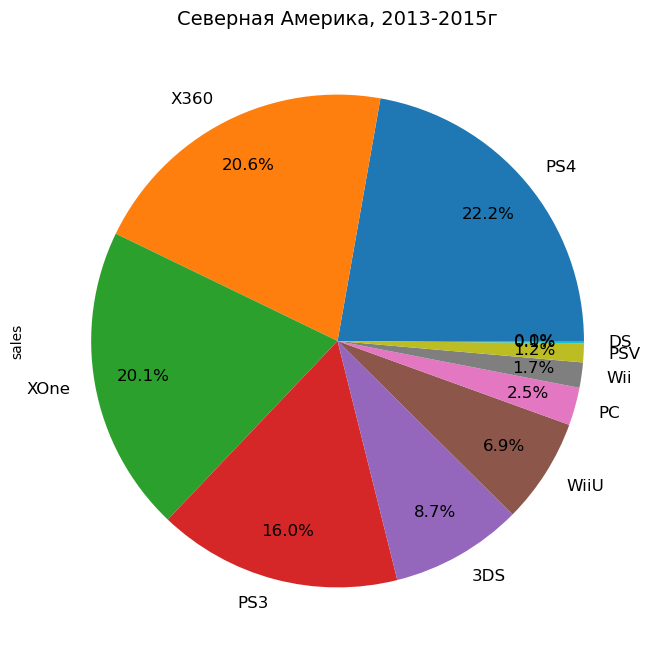

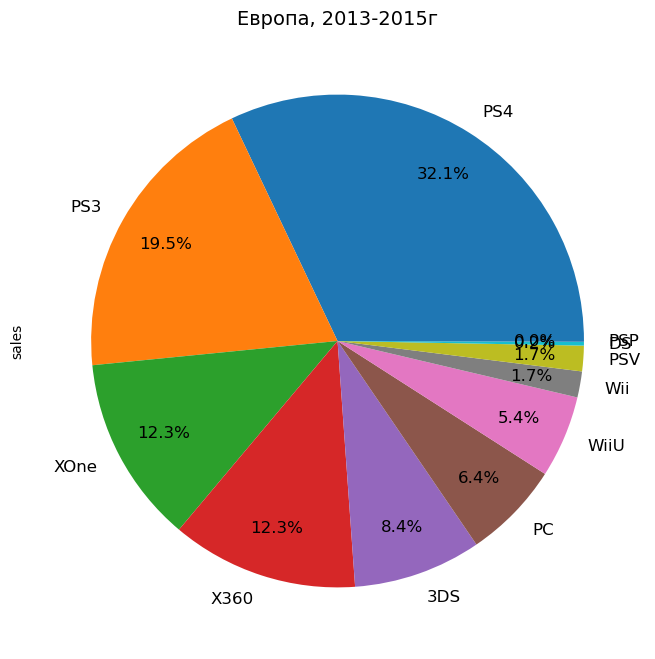

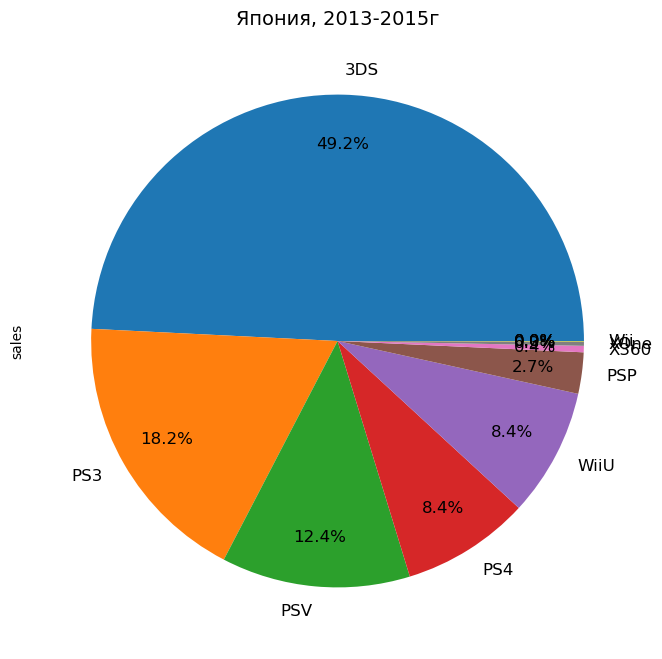

In [41]:
diagram_data = {'na_sales': 'Северная Америка', 'eu_sales': 'Европа', 'jp_sales': 'Япония'}
for key, value in diagram_data.items():
    pie_diagram(key, value, 'platform')

**Вывод** 

Рейтинг топ-5 Северной Америки:
- PS4 22,2%
- X360 20,6%
- XOne 20,1% 
- PS3 16.0%
- 3DS 8,7%

Рейтинг топ-5 Европы:
- PS4 32,1%
- PS3 19,5%
- X360 12,3%
- XOne 12,3% 
- 3DS 8,4%

Рейтинг топ-5 Японии:
- 3DS 49,2%
- PS3 18,2%
- PSV 12,4%
- PS4 8,4% 
- WiiU 8,4%

Мы видим, что все регионы отличаются по популярности платформ. 

Но в Северной Америке и Европе предпочтения схожие: на первом месте PS4, далее X360 и XOne имеют в Америке по 20% рынка, в Европе по 12%. PS3 в Европе чуть более популярна, чем в Америке: 19% против 16%. 3DS в этих регионах занимает последнюю позицию в топ-5 с популярностью в среднем 8,5%.

Япония сильно отличается по предпочтениям: почти половина продаж игр в Японии занимает платформа 3DS, это портативная консоль, в отличие от популярных в Европе и Северной Америке игровых приставок. Далее на втором месте PS3 с 18%. И на третьем месте опять портативная консоль PSV с 12% популярности. PS4 и WiiU имеют по 8,4% в рейтинге. X360 и XOne вообще не популярны в Японии.

### Самые популярные жанры в регионах

Теперь определим самые популярные жанры для трех регионов:

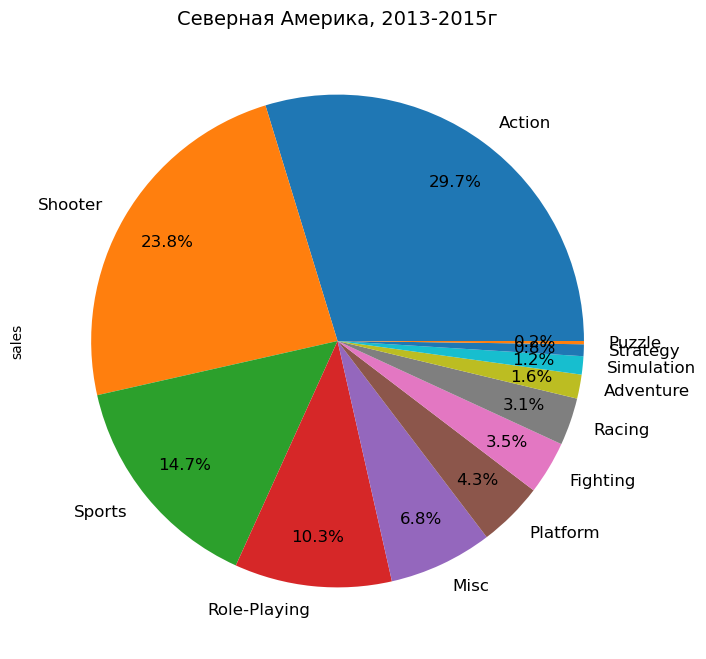

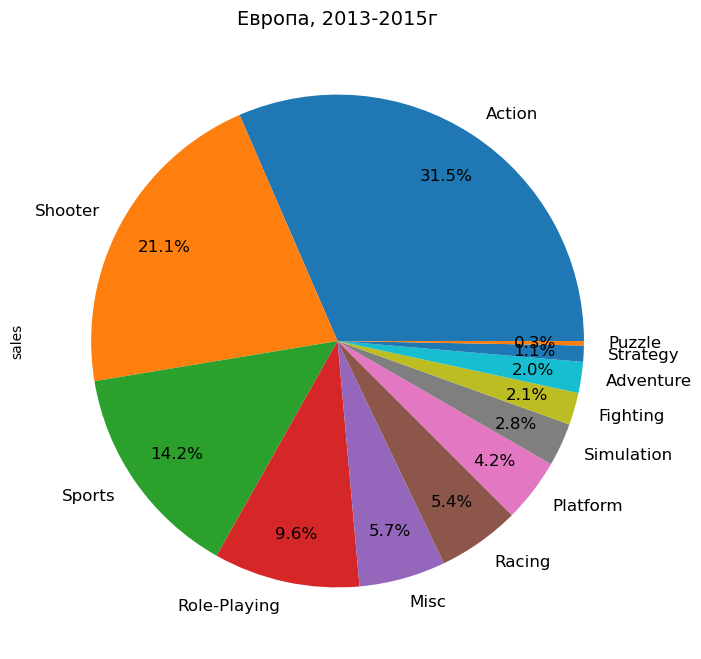

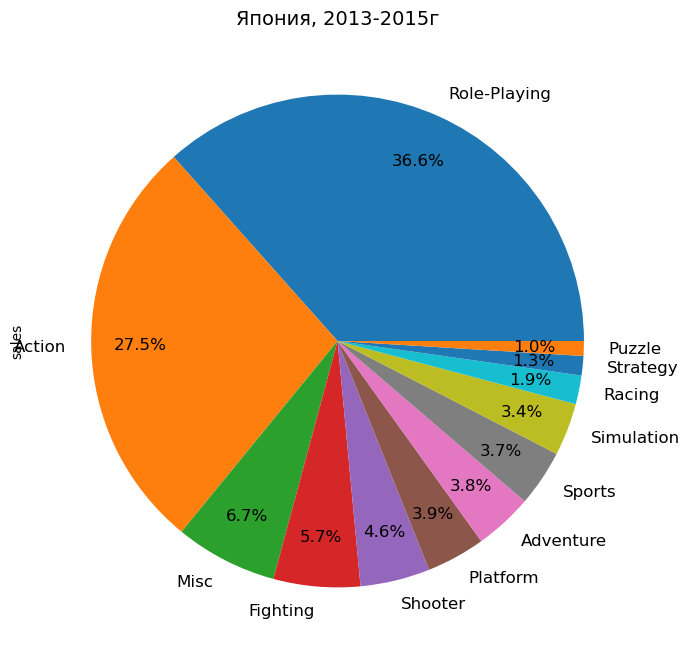

In [42]:
for key, value in diagram_data.items():
    pie_diagram(key, value, 'genre')


**Вывод** 

Рейтинг топ-5 жанров Северной Америки:
- Action 29,7%
- Shooter 23,8%
- Sports 14,7% 
- Role-Playing 10,3%
- Misc 6,8%

Рейтинг топ-5 жанров Европы:
- Action 31,5%
- Shooter 21,1%
- Sports 14,2%
- Role-Playing 9,6% 
- Misc 5,7%

Рейтинг топ-5 жанров Японии:
- Role-Playing 36,6%
- Action 27,5%
- Misc 6,7%
- Fighting 5,7% 
- Shooter 4,6%

В Северной Америке и Европе очень близкие значения популярности жанров. Самыми популярными являются Эксшн-игры (Action), занимают около 30% рынка, на втором месте жанр Shooter ("стрелялки") и на третьем игры, которые имитируют занятия спортом (Sports), далее идут жанры с популярностью менее 10%: Role-Playing, Misc и другие.

В Японии картина совсем другая: самыми популярными играми являются ролевые (Role-Playing), на втором месте жанр Эксшн (Action), далее с большим отрывом с низкой популярностью (ниже 7%) идут жанры: Misc, Fighting, Shooter и другие.

Такие различия в предпочтениях жанров обусловлены культурными особенностями регионов: в японской культуре ценится сдержанность эмоций, дисциплинированность, самообладание, вероятно поэтому игровой жанр Role-Playing выходит на первое место, а такой жанр как Shooter занимает не более 5% рынка в отличие от Европы и Америки в 21-24%. Но в любви к жанру Action сходятся все регионы, его популярность у всех близка к 30%. 

### Влияние рейтинга ESRB на продажи в регионах

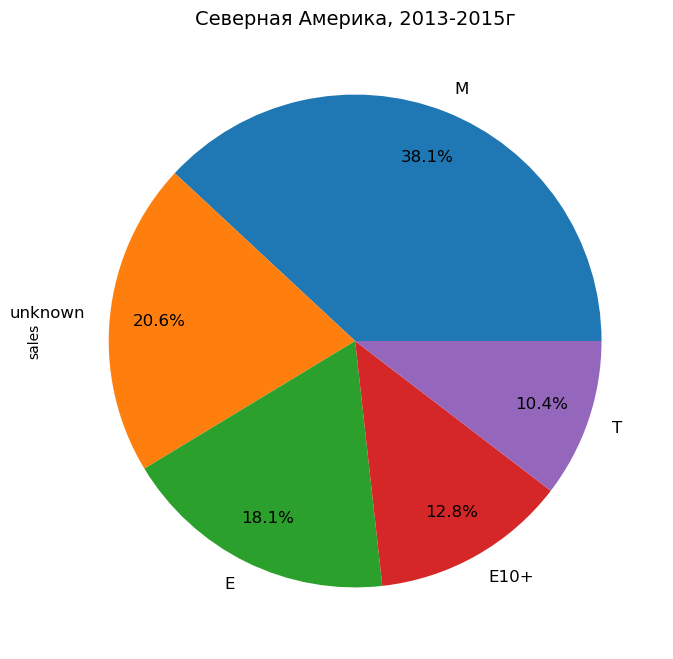

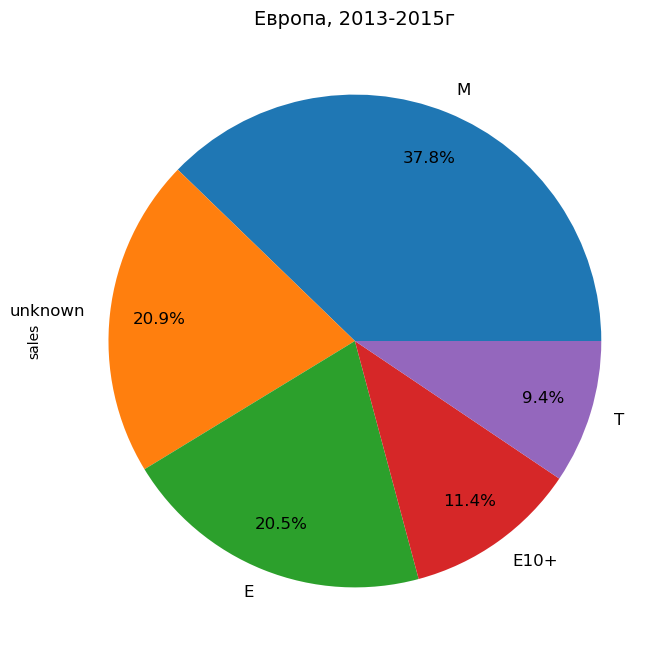

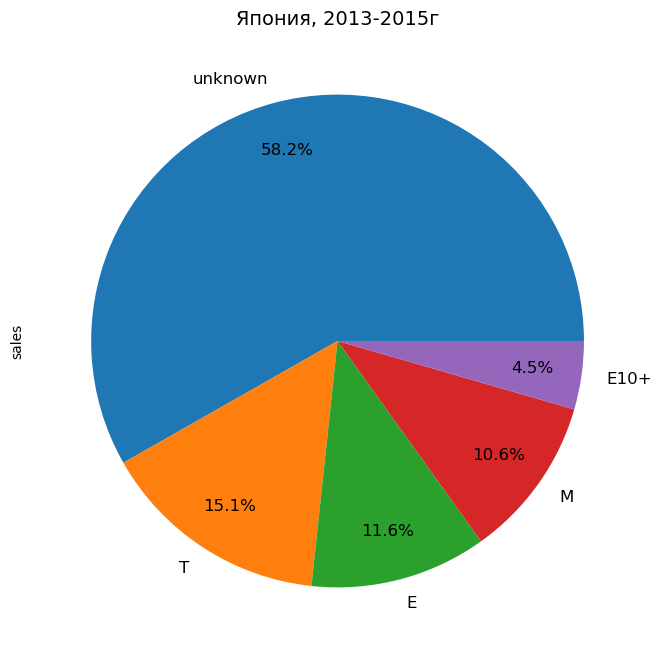

In [43]:
for key, value in diagram_data.items():
    pie_diagram(key, value, 'rating')

**Вывод** 

В Европе и Америке опять схожая картина по продажам: из имеющихся данных по рейтингу с наибольшими продажами игры категории М (Подходит для лиц старше 17 лет) - 38% и категории Е (Подходит для всех возрастных категорий) - 18-20%. 

По Японии больше половины данных по рейтингу отсутствуют, из имеющихся данных на первом месте по продажам категория Т (Подходит для лиц старше 13 лет) - 15%, далее Е и М по 11,6% и 10,6%.

У нас большая часть данных с отсутствующей информацией по рейтингу: по Северной Америке и Европе по 20%, а по Японии 58%. Поэтому эта доля данных могла бы оказать влияние на результаты, если бы данные были известны.

Так как большая часть данных у нас отсутствует, категории просто отражают возрастную категорию и носят рекомендательный характер, предлагаю считать, что рейтинг ESRB не влияет на продажи.

## Проверка гипотез

 Проверим две гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action и Sports разные.

**Проверим первую гипотезу**, нулевая гипотеза будет звучать так:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Проверим размер выборок:

In [44]:
display(actual_data.query('platform == "XOne"')['user_score'].count())
actual_data.query('platform == "PC"')['user_score'].count()

116

110

Выборки разного размера, поэтому примем допущение, что дисперсии выборок разные, поэтому equal_var поставим False.

In [45]:
#проверка гипотезы

alpha=0.05
results = st.ttest_ind\
(actual_data.query('platform == "XOne" and (user_score > 0)')['user_score'],\
                       actual_data.query('platform == "PC" and (user_score >0)')\
                     ['user_score'], equal_var=False)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем гипотезу о том, что средние пользовательские\
    рейтинги платформ Xbox One и PC одинаковые')
else: print('Не получилось отвергнуть гипотезу о том, что \nсредние пользовательские рейтинги платформ Xbox One и PC одинаковые')

p-значение: 0.2867036680187632
Не получилось отвергнуть гипотезу о том, что 
средние пользовательские рейтинги платформ Xbox One и PC одинаковые


**Результат** означает, что нет оснований считать средние пользовательские рейтинги платформ Xbox One и PC разными.

**Проверим вторую гипотезу** "Средние пользовательские рейтинги жанров Action и Sports разные"

Нулевая гипотеза Н0 будет звучать так:
- Средние пользовательские рейтинги жанров Action и Sports одинаковые
    
Альтернаятивная гипотеза Н1:    
- Средние пользовательские рейтинги жанров Action и Sports разные

In [46]:
#проверим размеры выборок

display(actual_data.query('genre == "Action"')['user_score'].count())
actual_data.query('genre == "Sports"')['user_score'].count()

304

123

Выборки разного размера, поэтому примем допущение, что дисперсии выборок разные, поэтому equal_var поставим False.

In [47]:
#проверка гипотезы

alpha=0.05
results = st.ttest_ind\
(actual_data.query('genre == "Action" and (user_score > 0)')['user_score'],\
                       actual_data.query('genre == "Sports" and (user_score >0)')\
                     ['user_score'], equal_var=False)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем гипотезу о том, что \nсредние пользовательские рейтинги жанров Action и Sports одинаковые')
else: print('Не получилось отвергнуть гипотезу о том, что \nсредние пользовательские рейтинги жанров Action и Sports одинаковые')

p-значение: 3.5076737062533423e-19
Отвергаем гипотезу о том, что 
средние пользовательские рейтинги жанров Action и Sports одинаковые


**Результат** означает, что гипотеза подтвердилась, значит есть основания полагать, что средние пользовательские рейтинги жанров Action и Sports разные.

## Вывод

**1 ЭТАП ОБЗОР ДАННЫХ**

Датасет состоял из 16715 строк и 11 колонок. 

Описание данных:

    Name — название игры
    Platform — платформа
    Year_of_Release — год выпуска
    Genre — жанр игры
    NA_sales — продажи в Северной Америке (миллионы проданных копий)
    EU_sales — продажи в Европе (миллионы проданных копий)
    JP_sales — продажи в Японии (миллионы проданных копий)
    Other_sales — продажи в других странах (миллионы проданных копий)
    Critic_Score — оценка критиков (максимум 100)
    User_Score — оценка пользователей (максимум 10)
    Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**2 ЭТАП ПРЕДОБРАБОТКА ДАННЫХ**

Были выполнены следующие работы:

- Привели названия столбцов к нижнему регистру 
- Заполнили пропуски в данных 
- Преобразовали типы данных 
- Рассчитали и добавили новый столбец 

В ходе предобработки было удалено 271 строк, это 1,62% данных. 

Для заполнения пропусков и изменения типов данных использовали методы fillna(), pd.to_numeric, astype().

В столбцах name (название игры) и year_of_release (год выпуска игры) содержится ключевая информация для нашей задачи анализа. Пропуски составляли всего 1,6% всего датасета, поэтому удалили эти строки.

В столбце genre (жанр игры) строки с пропусками попали под раннее удаление.

В столбце critic_score (оценка критиков) 50% пропусков.

В столбце user_score (оценка пользователей) 39,5% пропусков.

Оставили пропуски как есть, так как логически заполнить эти данные нечем, при дальнейшем анализе будем использовать логическую индексацию для выбора заполненных строк.

В столбце rating (рейтинг от организации 'ESRB') 39,9% пропусков. Пропущенные значения заполнили заглушкой "unknown".

Изменили тип данных некоторых столбцов:

year_of_release - год выпуска игры, привели к типу int.

user_score - оценка пользователей, перевели из строкового в вещественные числа float64, а значения tbd заменили на nan.

Для дальнейшего анализа рассчитали суммарные продажи во всех регионах и добавили данные в отдельный столбец total_sales.

**3 ЭТАП ИССЛЕДОВАТЕЛЬСКИЙ АНАЛИЗ**

**Анализ выпуска игр**

По имеющимся у нас данным, с 1980 по 1993 год выпускалось до 60 игр в год.

Начиная с 1993 года наблюдался устойчивый рост в выпуске игр.

В 2002 году произошел резкий скачок, количество выпускаемых игр увеличилось на 72% по сравнению с предыдущим годом (2001г- 482 игры, 2002г- 829), рост продолжался до 2010 года, пик пришелся на 2008-2009 годы с выпуском в 1427 и 1426 игр/год.

В 2010 выпуск пошел на спад, особенно резкое снижение произошло в 2012 году, на 42,5% по сравнению с предыдущим годом (2011г- 1136 игр, 2012г- 653).

Далее с 2012 года до сегоднешнего дня (декабрь 2016 года) колебания находятся в пределах 500-650 игр/год.

**Анализ продаж по платформам**

Характерный срок "жизни" платформы составляет 10-11 лет. Своего пика продажи для новой платформы достигают на 5-6 год, далее наблюдается спад.

**Анализ лидеров продаж, выбор потенциально прибыльных платформ**

Так как технологии в сфере компьютерных игр развиваются стремительно, то данные за все время наблюдений будут для нас не информативны. Для решения задачи проекта взяли данные за последние три полных года (2013 - 2015), исключая текущий 2016, так как данные за него неполные. 

Выделим **топ-5 лидеров продаж** за 2013-2015 годы: PS4, PS3, X360, XOne, 3DS.

В качестве **потенциально прибыльных платформ** можно выделить PS4 и XOne, жизненный цикл платформ находится в стадии роста, их продажи растут. 

Остальные платформы показывают снижение продаж в последние три года.

По типичному размеру продаж также можно выделить лидерами XOne и PS4. Далее на убывание идут: X360, PS3, 3DS. Самые низкие типичные объемы продаж у 3DS, 75% их продаж на уровне медианных продаж лидеров.

**Влияние на продажи отзывов пользователей и критиков**

 Лидеры продаж показывают взаимосвязь между продажами и оценками критиков: при оценке выше 50 наблюдается постепенное увеличение продаж, лучше всего продаются игры при оценках в 70-90 пунктов. 
 
Влияние оценок пользователей слабое либо отсутствует.

**Распределение игр по жанрам**

 Самые высокие медианные продажи, а соответственно, и прибыльные, у жанров (по убыванию): Shooter, Sports, Platform, Racing и Misc. 

**4 ЭТАП ПОРТРЕТ ПОЛЬЗОВАТЕЛЯ КАЖДОГО РЕГИОНА**

**Самые популярные платформы в регионах**

Все регионы отличаются по популярности платформ. 

Северной Америке и Европе предпочтения схожие: на первом месте PS4, далее X360 и XOne имеют в Америке по 20% рынка, в Европе по 12%. PS3 в Европе чуть более популярна, чем в Америке: 19% против 16%. 3DS в этих регионах занимает последнюю позицию в топ-5 с популярностью в среднем 8,5%.

Япония сильно отличается по предпочтениям: почти половина продаж игр в Японии занимает платформа 3DS, это портативная консоль, в отличие от популярных в Европе и Северной Америке игровых приставок. Далее на втором месте PS3 с 18%. И на третьем месте опять портативная консоль PSV с 12% популярности. PS4 и WiiU имеют по 8,4% в рейтинге. 

X360 и XOne вообще не популярны в Японии.

**Самые популярные жанры в регионах**

В Северной Америке и Европе очень близкие значения популярности жанров. Самыми популярными являются Эксшн-игры (Action), занимают около 30% рынка, на втором месте жанр Shooter ("стрелялки") и на третьем игры, которые имитируют занятия спортом (Sports), далее идут жанры с популярностью менее 10%: Role-Playing, Misc и другие.

В Японии картина совсем другая: самыми популярными играми являются ролевые (Role-Playing), на втором месте жанр Эксшн (Action), далее с большим отрывом с низкой популярностью (ниже 7%) идут жанры: Misc, Fighting, Shooter и другие.

Такие различия в предпочтениях жанров обусловлены культурными особенностями регионов: в японской культуре ценится сдержанность эмоций, дисциплинированность, самообладание, вероятно поэтому игровой жанр Role-Playing выходит на первое место, а такой жанр как Shooter занимает не более 5% рынка в отличие от Европы и Америки в 21-24%. 

Но в любви к жанру Action сходятся все регионы, его популярность у всех близка к 30%. 

**Влияние рейтинга ESRB на продажи в регионах**

В Европе и Америке опять схожая картина по продажам: из имеющихся данных по рейтингу, с наибольшими продажами игры категории М (Подходит для лиц старше 17 лет) - 38% и категории Е (Подходит для всех возрастных категорий) - 18-20%. 

По Японии больше половины данных по рейтингу отсутствуют, из имеющихся данных на первом месте по продажам категория Т (Подходит для лиц старше 13 лет) - 15%, далее Е и М по 11,6% и 10,6%.

У нас большая часть данных с отсутствующей информацией по рейтингу: по Северной Америке и Европе по 20%, а по Японии 58%. Поэтому эта доля данных могла бы оказать влияние на результаты, если бы данные были известны. 

Так как большая часть данных у нас с отсутствующим рейтингом, а категории носят рекомендательный характер, предлагаю считать, что рейтинг ESRB не влияет на продажи.

**5 ЭТАП ПРОВЕРКА ГИПОТЕЗ**

Проверим две гипотезы:

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые; 
- Средние пользовательские рейтинги жанров Action и Sports разные. 

Первая гипотеза подтвердилась: нет оснований считать средние пользовательские рейтинги платформ Xbox One и PC разными.

Вторая гипотеза тоже подтвердилась, значит средние пользовательские рейтинги жанров Action и Sports разные.

## Рекомендации


**Потенциально популярные игры:**

- в приоритете для платформ PS4 и XOne (жизненный цикл платформ находится в стадии роста, типичные объемы продаж выше остальных)
- для топ-5 лидеров продаж: PS4, PS3, X360, XOne, 3DS.
- с рейтингом критиков от 50 пунктов, желательно от 70 (при оценке выше 50 наблюдается постепенное увеличение продаж, лучше всего продаются игры при оценках в 70-90 пунктов)
- не стоит ориентироваться на оценки пользователей (влияние слабое либо отсутствует)
- в жанрах: Shooter, Sports, Platform, Racing и Misc, в порядке убывания медианных продаж

**Портрет пользователя по регионам:**

Если ориентироваться на рынок Америки и Европы, то их предпочтения в платформах и жанрах игр очень схожие.

Если ориентироваться на рынок Японии, то стоит обратить внимание, что их предпочтения сильно отличаются от европейских.

**СЕВЕРНАЯ АМЕРИКА**

Рейтинг топ-5 платформ Северной Америки:

    PS4 22 %
    X360 21 %
    XOne 20 %
    PS3 16 %
    3DS 9 %

Рейтинг топ-5 жанров Северной Америки:

    Action 30 %
    Shooter 24 %
    Sports 15 %
    Role-Playing 10 %
    Misc 7 %

**ЕВРОПА**

Рейтинг топ-5 платформ Европы:

    PS4 32 %
    PS3 20 %
    X360 12 %
    XOne 12 %
    3DS 8 %

Рейтинг топ-5 жанров Европы:

    Action 32 %
    Shooter 21 %
    Sports 14 %
    Role-Playing 10 %
    Misc 6 %

**ЯПОНИЯ**

Рейтинг топ-5 платформ Японии:

    3DS 49 %
    PS3 18 %
    PSV 12 %
    PS4 8 %
    WiiU 8 %

Рейтинг топ-5 жанров Японии:

    Role-Playing 37 %
    Action 28 %
    Misc 7 %
    Fighting 6 %
    Shooter 5 %